In [1]:
import pandas as pd
import numpy as np
import  textblob
from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('C:/Users/HP/Downloads/6. Analyzing online Job Postings/data job posts.csv')

In [3]:
df.head(5)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [4]:
# Getting the basic info of DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15109 non-null object
JobRequirment       16479 non-null object
RequiredQual        18517 non-null object
Salary              9622 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
Notes               2211 non-null object
AboutC              12470 non-null object
Attach              1559 non-null object
Year              

In [5]:
df=df[df['Title'].isnull()==False]
df.reset_index(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18973 entries, 0 to 18972
Data columns (total 25 columns):
index               18973 non-null int64
jobpost             18973 non-null object
date                18973 non-null object
Title               18973 non-null object
Company             18973 non-null object
AnnouncementCode    1206 non-null object
Term                7671 non-null object
Eligibility         4929 non-null object
Audience            640 non-null object
StartDate           9672 non-null object
Duration            10788 non-null object
Location            18948 non-null object
JobDescription      15090 non-null object
JobRequirment       16459 non-null object
RequiredQual        18496 non-null object
Salary              9614 non-null object
ApplicationP        18920 non-null object
OpeningDate         18275 non-null object
Deadline            18915 non-null object
Notes               2208 non-null object
AboutC              12460 non-null object
Attach            

In [7]:
#Defining x

X = df['Title']

In [14]:
import re

#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [15]:
from nltk.corpus import stopwords

In [16]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','na','Senior','new','branch','Junior','unit','department','Specialist','the','unit'])

In [17]:
from textblob import Word
import string
def pre_process(text):
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop_words)) #Removing stop words
    text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    return(text)

In [18]:
df.Title = df.Title.apply(lambda x: clean_text(x))

In [20]:
df.Title=pre_process(df.Title)

In [21]:
df.Title

0                                  chief financial officer
1        fulltime community connection intern paid inte...
2                                      country coordinator
3                                           bcc specialist
4                                       software developer
5                                               saleswoman
6                       chief accountant finance assistant
7               nonpaid part full time programmatic intern
8                              assistant managing director
9                            program assistant inl fsn fp*
10                      shortterm travel grant stg program
11            nonpaid part full time administrative intern
12                                         chief party cop
13        community development capacity building conflict
14                                         general manager
15                                   network administrator
16                              utopian world championsh

In [22]:
date= df['Year'].tolist()

## Job nature change over time

In [23]:
Job_year = pd.DataFrame(np.column_stack([df.Title , date]), 
                               columns=['Job_title','Year'])

In [24]:
Job_year.head(3)

,Job_title,Year
0,chief financial officer,2004
1,fulltime community connection intern paid inte...,2004
2,country coordinator,2004


In [25]:
Job_year.dtypes

Job_title    object
Year         object
dtype: object

In [26]:
#Converting year to numeric value 

Job_year['Year']=Job_year['Year'].astype('int')

Job_year.dtypes

Job_title    object
Year          int32
dtype: object

In [27]:
Job_year['Year'].value_counts()

2012    2140
2015    2009
2013    2009
2014    1980
2008    1782
2011    1695
2007    1538
2010    1506
2009    1191
2005    1138
2006    1111
2004     874
Name: Year, dtype: int64

In [28]:
Job_year['Year_bins'] = pd.qcut(Job_year['Year'],3,labels=['P1' , 'P2' , 'P3']) #dividing in 3 equidistant bins

In [29]:
Job_year.head(3)

,Job_title,Year,Year_bins
0,chief financial officer,2004,P1
1,fulltime community connection intern paid inte...,2004,P1
2,country coordinator,2004,P1


In [30]:
Job_year.pivot_table(values='Year', index='Year_bins', aggfunc = ['min','max','count'])

,min,max,count
,Year,Year,Year
Year_bins,,,
P1,2004,2008,6443
P2,2009,2012,6532
P3,2013,2015,5998


In [31]:
X1=Job_year[Job_year['Year_bins']=='P1'].iloc[:,0]

#Job nature change over the period (2004 to 2007)

In [33]:
# Selecting top 10 jobs for the plot

titlecount = {}
for data in X1:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in titlecount.keys():
            titlecount[word] = 1
        else:
            titlecount[word] += 1

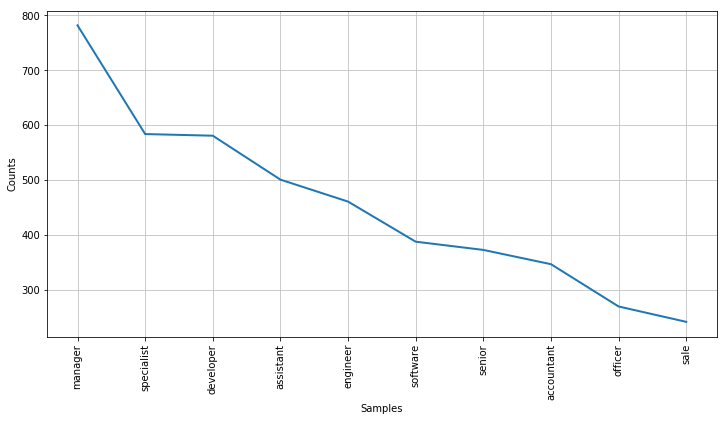

In [38]:
# plotting for the top 10 jobs

from nltk import FreqDist

import matplotlib.pyplot as plt

fdist1 = FreqDist(titlecount)

fdist1.items()

plt.figure(figsize=(12, 6))

fdist1.plot(10)

plt.show()

In [35]:
X2=Job_year[Job_year['Year_bins']=='P2'].iloc[:,0]

#Job nature change over the period (2008 to 2011)

In [36]:
# Selecting top 10 jobs for the plot

titlecount = {}
for data in X1:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in titlecount.keys():
            titlecount[word] = 1
        else:
            titlecount[word] += 1

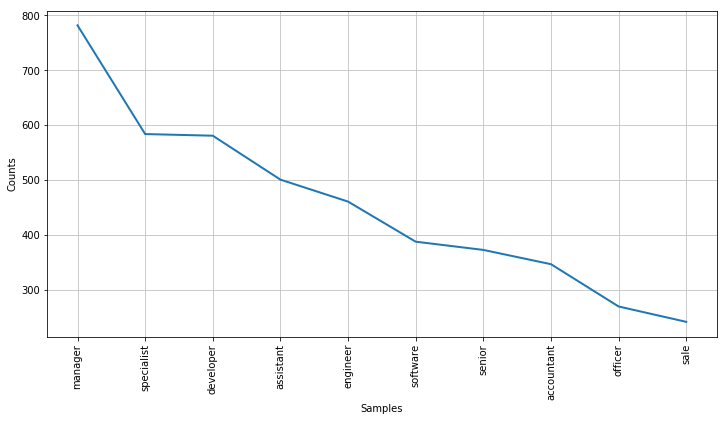

In [37]:
# plotting for the top 10 jobs

from nltk import FreqDist

import matplotlib.pyplot as plt

fdist1 = FreqDist(titlecount)

fdist1.items()

plt.figure(figsize=(12, 6))

fdist1.plot(10)

In [39]:
X3=Job_year[Job_year['Year_bins']=='P3'].iloc[:,0]

#Job nature change over the period (2012 to 2015)

In [40]:
# Selecting top 10 jobs for the plot

titlecount = {}
for data in X1:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in titlecount.keys():
            titlecount[word] = 1
        else:
            titlecount[word] += 1

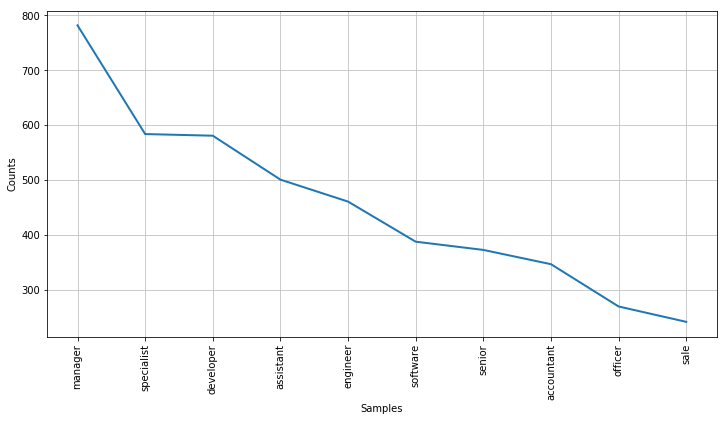

In [41]:
# plotting for the top 10 jobs

from nltk import FreqDist

import matplotlib.pyplot as plt

fdist1 = FreqDist(titlecount)

fdist1.items()

plt.figure(figsize=(12, 6))

fdist1.plot(10)

## IT Job Classification

In [42]:
# Defining X

X=df['Title']

# Defining Y
di={False:0,True:1}
df['IT_y']=df['IT'].map(di)
y=df['IT_y']

In [44]:
# Creating the corpus
import re
corpus = []
for i in range(0, len(X)):
    review = re.sub(r'\W', ' ', str(X[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', ' ', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)  

In [45]:
corpus[0]

'chief financial officer'

In [46]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Stemming
for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [stemmer.stem(word) for word in words]
    corpus[i] = ' '.join(words) 

In [47]:
# Creating the Tf-Idf model directly
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 0.05, max_df = 0.8, stop_words = stopwords.words('english'))

X = vectorizer.fit_transform(corpus).toarray()

In [48]:
X.shape

(18973, 10)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345)

In [51]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( X_train, y_train )

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
#Predicting the test cases
from sklearn import metrics
test_accuracy=metrics.accuracy_score(y_test,logreg.predict(X_test))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(y_train,logreg.predict(X_train))
print('train_accuracy: ',train_accuracy)

test_accuracy:  0.9118887015177066
train_accuracy:  0.9159463068381475


In [53]:
print('AUC train :',metrics.roc_auc_score(y_train,logreg.predict(X_train)))
print('AUC test :',metrics.roc_auc_score(y_test,logreg.predict(X_test)))

AUC train : 0.825397636727035
AUC test : 0.814612493279761


Text(0.5, 15.0, 'Predicted label')

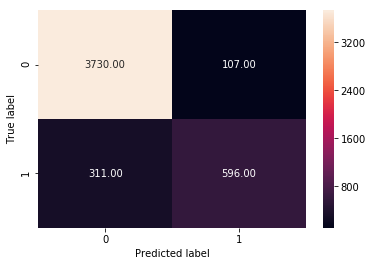

In [54]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix(y_test,
                            logreg.predict(X_test), [0,1] )
cm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [55]:
from sklearn.naive_bayes import GaussianNB

nb_clf=GaussianNB()

nb_clf.fit( X_train, y_train )

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
#Predicting the test cases
from sklearn import metrics
test_accuracy=metrics.accuracy_score(y_test,nb_clf.predict(X_test))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(y_train,nb_clf.predict(X_train))
print('train_accuracy: ',train_accuracy)

test_accuracy:  0.8954468802698144
train_accuracy:  0.9023121793520276


In [184]:
print('AUC train :',metrics.roc_auc_score(y_train,nb_clf.predict(X_train)))
print('AUC test :',metrics.roc_auc_score(y_test,nb_clf.predict(X_test)))

AUC train : 0.829351552139901
AUC test : 0.8187608669603889


Text(0.5, 15.0, 'Predicted label')

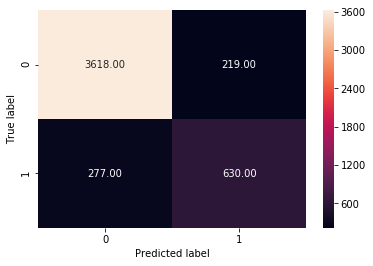

In [58]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix(y_test,
                            nb_clf.predict(X_test), [0,1] )
cm

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Segmentation

In [60]:
df.Title[0:5]

0                              chief financial officer
1    fulltime community connection intern paid inte...
2                                  country coordinator
3                                       bcc specialist
4                                   software developer
Name: Title, dtype: object

In [61]:
# Creating the Tf-Idf model directly
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 0.01, max_df = 0.9, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(df.Title).toarray()

In [62]:
X.shape

(18973, 50)

In [63]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [74]:
cluster_range = range( 1, 21 )
cluster_errors = []

for n in cluster_range:
    clusters = KMeans(n)
    clusters.fit(X)
    cluster_errors.append( clusters.inertia_ )

In [75]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,15592.054564
1,2,14247.088908
2,3,13286.558385
3,4,12274.187546
4,5,11754.844032
5,6,11037.408297
6,7,10707.433284
7,8,10136.731118
8,9,9900.007635
9,10,9349.595703


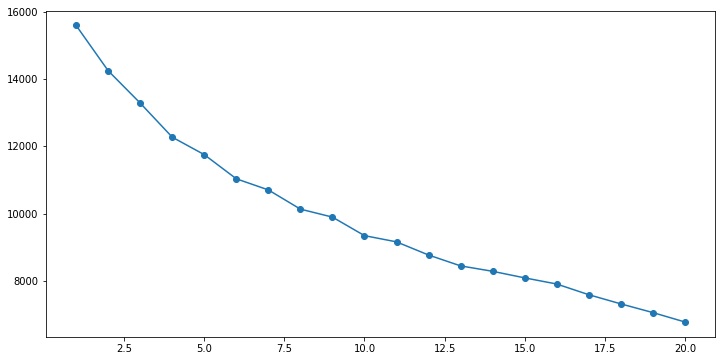

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [83]:
k = 6 #Choosing k = 6
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=6, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [85]:
res = model.fit(X)
res

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=6, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [86]:
vocab = vectorizer.get_feature_names()
vocab = np.array(vocab)

In [87]:
cluster_centers = np.array(res.cluster_centers_)

In [88]:
res.cluster_centers_[0].argsort()

array([11,  0, 16, 43, 29, 37, 33, 10, 44, 24, 28,  6, 15, 46, 20,  5, 30,
        9, 17, 27, 32, 47, 41, 25, 45, 21, 48, 18, 26, 13, 49, 23, 35, 31,
       36,  3, 39, 38,  1,  7, 19,  2,  8, 14, 42, 22, 40, 34,  4, 12],
      dtype=int64)

In [89]:
# sorting the cluster centers
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]

In [93]:
# getting top 5 jobs from each cluster

words=set()
for i in range(len(res.cluster_centers_)):
    words = set(vocab[sorted_vals[i][-5:]])
    print(words)

{'senior', 'assistant', 'developer', 'officer', 'head'}
{'sale', 'office', 'project', 'manager', 'marketing'}
{'senior', 'specialist', 'management', 'marketing', 'development'}
{'senior', 'support', 'engineer', 'qa', 'software'}
{'senior', 'designer', 'developer', 'web', 'junior'}
{'senior', 'accountant', 'assistant', 'chief', 'financial'}
